# **Exploratory Data Analysis on Dataset - Terrorism**  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

%matplotlib inline

In [2]:
data = pd.read_csv("globalterrorismdb_0718dist.csv",encoding ='latin =1')
data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,31,33,61,62,63,76,79,90,92,94,96,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69498,199910040002,1999,10,4,NaN,0,NaN,8,Angola,11.0,...,NaN,"""Angola: UNITA Reportedly Kills 36 Civilians i...",NaN,NaN,CETIS,0.0,0.0,0.0,0.0,NaN
69499,199910040003,1999,10,4,NaN,0,NaN,45,Colombia,3.0,...,Several reports stated that some or all of the...,"""Army Rescues Children, Adults Kidnapped 4 Oct...","Colombian Army Frees 40 Kidnaped [sic] Men, ...",At least 40 hostages taken in northern Colomb...,CETIS,0.0,0.0,0.0,0.0,NaN
69500,199910040004,1999,10,4,NaN,0,NaN,185,Spain,8.0,...,NaN,"""Spain: PP Member's Car Burned in Basque Count...",NaN,NaN,CETIS,-9.0,-9.0,0.0,-9.0,NaN
69501,199910040005,1999,10,4,NaN,0,NaN,185,Spain,8.0,...,NaN,"""Spain: Arson Attack Targets Herri Batasuna Pr...",NaN,NaN,CETIS,-9.0,-9.0,0.0,-9.0,NaN


In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


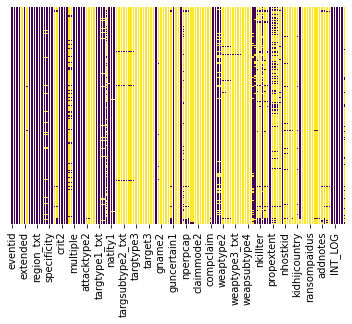

In [4]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69503 entries, 0 to 69502
Columns: 135 entries, eventid to related
dtypes: float64(71), int64(6), object(58)
memory usage: 71.6+ MB


In [6]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,6.950300e+04,69503.000000,69503.000000,69503.000000,69503.000000,69503.000000,69502.000000,65790.000000,6.578900e+04,69502.000000,...,7.090000e+02,34.000000,1.980000e+02,39.000000,1847.000000,1484.000000,69502.000000,69502.000000,69502.000000,69502.000000
mean,1.987259e+11,1987.192668,6.449276,15.378919,0.021596,146.329022,5.754597,18.483214,-1.322065e+03,1.440275,...,3.366061e+06,14097.264706,1.040590e+06,2935.384615,3.344342,0.634771,-3.729993,-3.689002,0.126342,-2.942994
std,6.684844e+08,6.684525,3.386507,8.805010,0.145362,134.275639,3.207680,24.267536,3.360157e+05,1.115814,...,3.838159e+07,69028.573564,4.190744e+06,10589.759576,1.686573,41.819975,4.496500,4.551104,0.806457,4.509628
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-99.000000,-9.900000e+01,-99.000000,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.982110e+11,1982.000000,4.000000,8.000000,0.000000,61.000000,3.000000,6.053240,-7.556477e+01,1.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000,2.000000,1.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,1.988061e+11,1988.000000,6.000000,15.000000,0.000000,110.000000,6.000000,15.587991,-2.921819e+00,1.000000,...,2.000000e+04,0.000000,4.350000e+03,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.992071e+11,1992.000000,9.000000,23.000000,0.000000,183.000000,8.000000,38.395649,3.509416e+01,1.000000,...,5.900000e+05,0.000000,1.940000e+05,0.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000
max,1.999100e+11,1999.000000,12.000000,31.000000,1.000000,1003.000000,12.000000,74.633553,1.784419e+02,5.000000,...,1.000000e+09,400000.000000,4.100000e+07,48000.000000,7.000000,390.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999983,0.010567,0.010604,0.039547,-0.179383,0.167246,-0.084696,0.003007,0.079486,...,-0.004838,-0.008023,-0.080603,-0.074921,0.288312,-0.249631,-0.134911,-0.134474,-0.101377,-0.151731
iyear,0.999983,1.000000,0.005481,0.010490,0.039578,-0.179314,0.167395,-0.084477,0.003040,0.079522,...,-0.004724,-0.007095,-0.080785,-0.074789,0.288194,-0.249525,-0.134826,-0.134389,-0.101360,-0.151614
imonth,0.010567,0.005481,1.000000,0.000466,-0.002992,-0.015184,-0.025354,-0.039614,-0.006384,-0.007160,...,-0.027247,-0.154914,0.050911,-0.019711,0.008726,-0.022059,-0.020478,-0.020290,-0.003897,-0.026576
iday,0.010604,0.010490,0.000466,1.000000,-0.005843,0.010513,0.005250,-0.006342,-0.003811,-0.021096,...,0.002816,0.222320,0.027160,0.065242,-0.008062,0.023308,-0.003981,-0.004779,0.001038,-0.001141
extended,0.039547,0.039578,-0.002992,-0.005843,1.000000,-0.043306,-0.007056,-0.018245,0.000565,0.035674,...,-0.023023,0.034292,-0.049754,0.081975,0.015047,-0.119060,0.015249,0.020383,0.032569,0.036906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.249631,-0.249525,-0.022059,0.023308,-0.119060,0.064471,0.043646,0.117355,0.058850,-0.029338,...,0.006197,0.157065,0.082181,0.181174,-0.441500,1.000000,-0.060253,-0.059103,0.049216,-0.029402
INT_LOG,-0.134911,-0.134826,-0.020478,-0.003981,0.015249,0.145736,-0.065721,-0.003459,0.004485,0.079236,...,0.024451,0.086316,-0.113293,-0.291971,-0.037970,-0.060253,1.000000,0.994024,0.062426,0.843243
INT_IDEO,-0.134474,-0.134389,-0.020290,-0.004779,0.020383,0.139659,-0.061407,-0.003076,0.004466,0.077462,...,0.023315,0.128412,-0.106639,-0.269281,-0.042728,-0.059103,0.994024,1.000000,0.104490,0.847563
INT_MISC,-0.101377,-0.101360,-0.003897,0.001038,0.032569,0.242209,0.089977,0.143228,0.000636,-0.049377,...,-0.007317,0.281441,0.008889,0.337672,-0.068553,0.049216,0.062426,0.104490,1.000000,0.276557


In [8]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

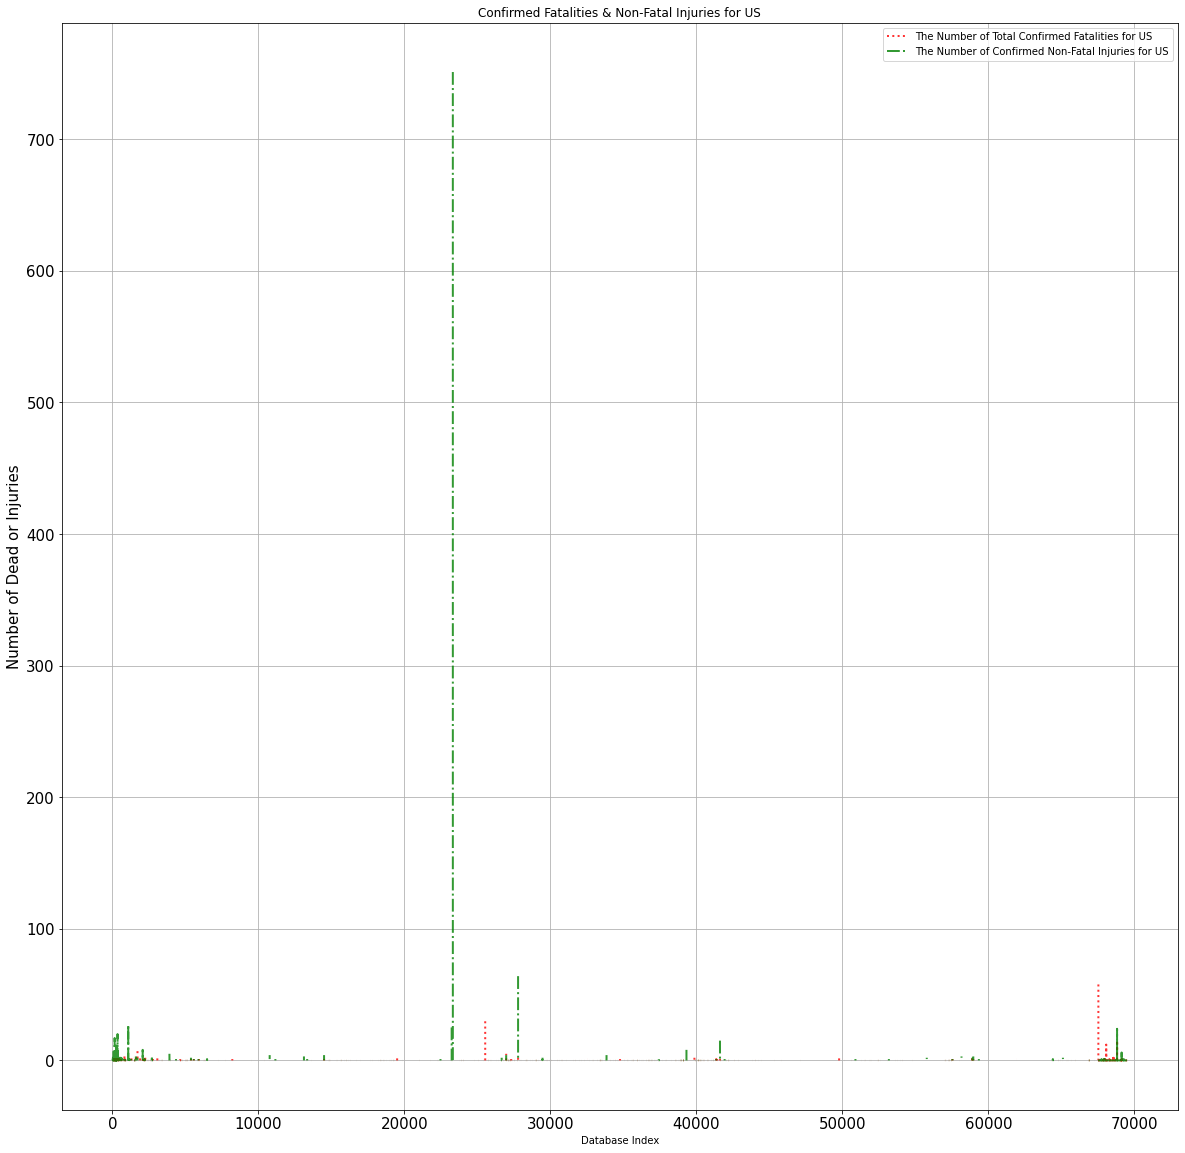

In [10]:
data.nkillus.plot(kind = 'line', color = 'red', label = 'The Number of Total Confirmed Fatalities for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
data.nwoundus.plot(color = "green", label = 'The Number of Confirmed Non-Fatal Injuries for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     
plt.xlabel('Database Index', fontsize=10)              
plt.ylabel('Number of Dead or Injuries', fontsize=15)

plt.title('Confirmed Fatalities & Non-Fatal Injuries for US')            
plt.show()

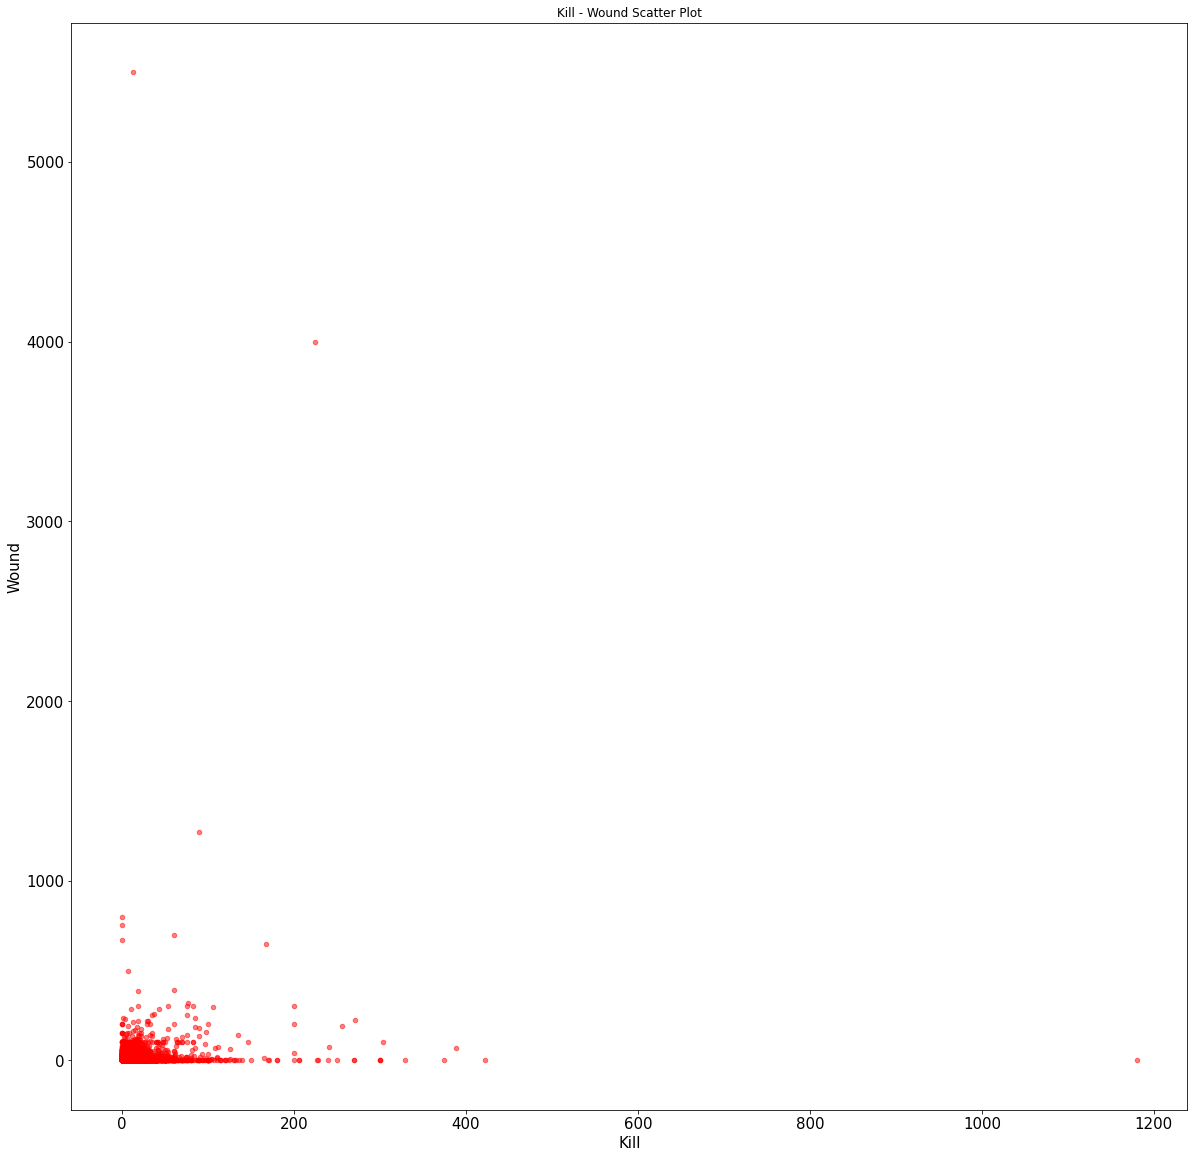

In [11]:
data.plot(kind = 'scatter', x = 'nkill', y = 'nwound', alpha = 0.5, color = 'red', figsize = (20,20), fontsize=15)
plt.xlabel('Kill', fontsize=15)
plt.ylabel('Wound', fontsize=15)
plt.title('Kill - Wound Scatter Plot')
plt.show()

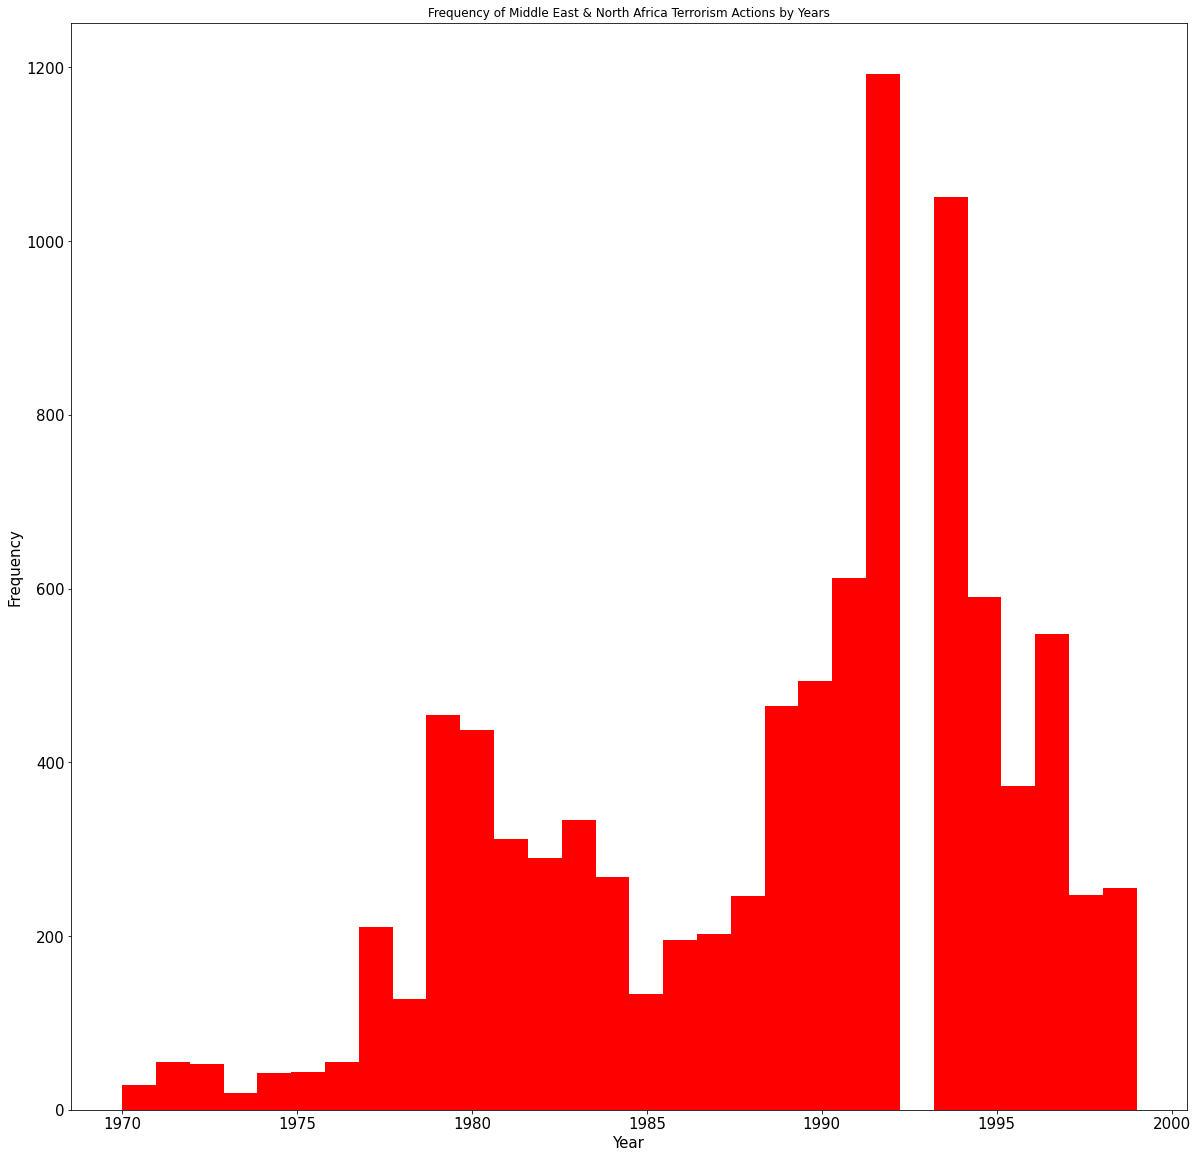

In [12]:
middleEastData = data[data['region'] == 10]
middleEastData.iyear.plot(kind = 'hist', bins = 30, figsize = (20,20), color = 'red', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Frequency of Middle East & North Africa Terrorism Actions by Years')
plt.show()

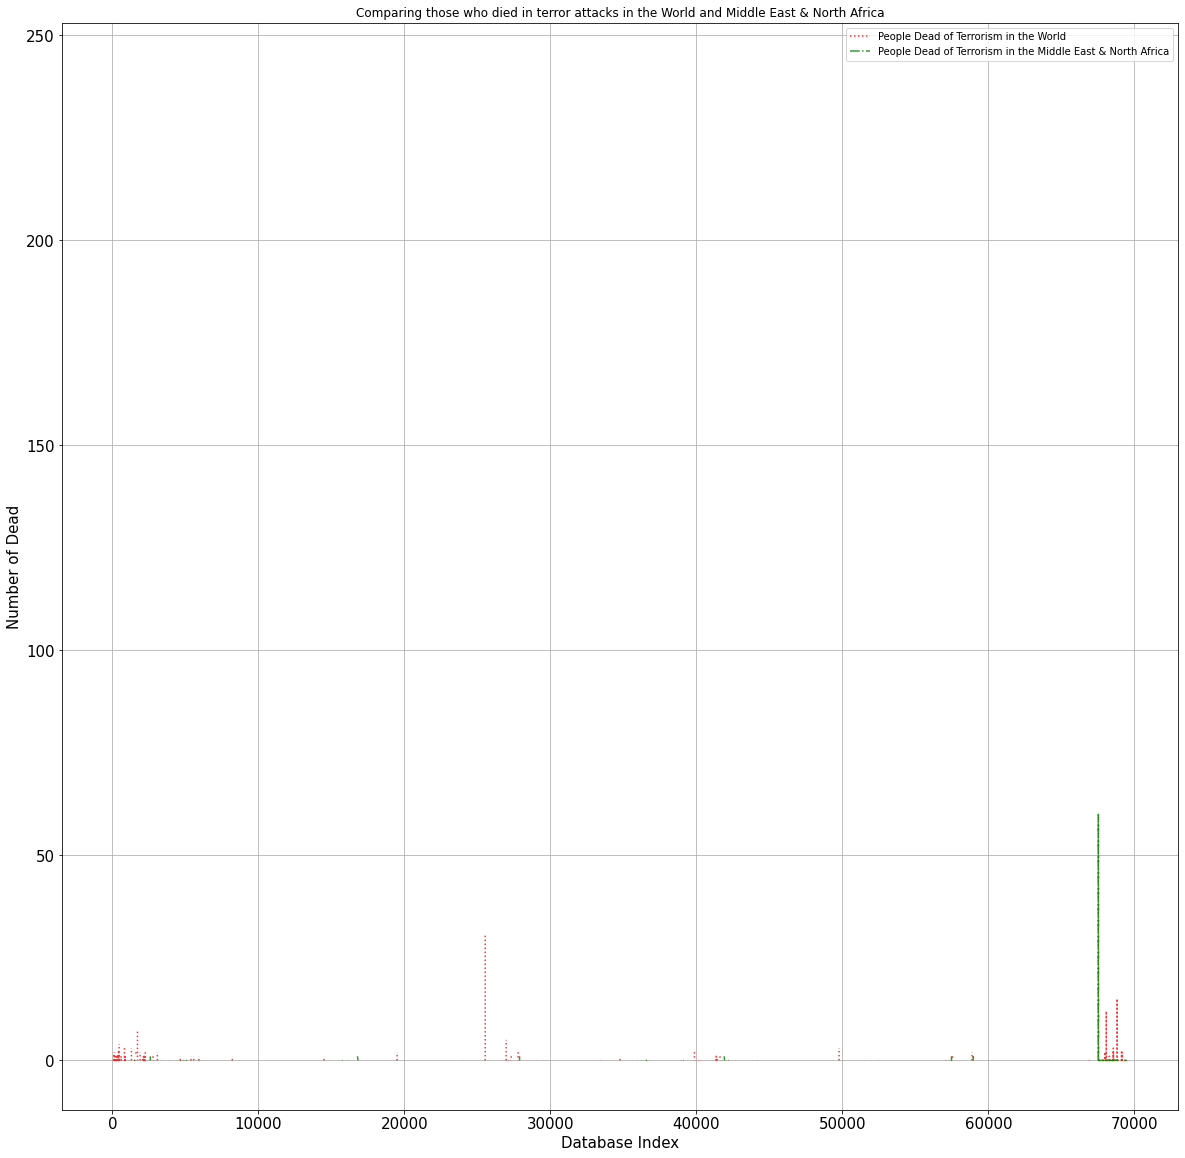

In [13]:
data.nkillus.plot(kind = 'line', color = 'red', label = 'People Dead of Terrorism in the World', linewidth = 1.5, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (20,20), fontsize=15)
middleEastData.nkillus.plot(color = "green", label = 'People Dead of Terrorism in the Middle East & North Africa', linewidth = 1.5, alpha = 0.8, 
                            grid = True, linestyle = '-.', figsize = (20,20), fontsize=15)

plt.legend(loc='upper right')     
plt.xlabel('Database Index', fontsize=15)             
plt.ylabel('Number of Dead', fontsize=15)
plt.title('Comparing those who died in terror attacks in the World and Middle East & North Africa')            
plt.show()

Terrorist Attacks of a Particular year and their Locations. Let's look at the terrorist acts in the world over a certain year.

In [14]:
filterYear = data['iyear'] == 1970

In [16]:
filterData = data[filterYear] 
reqFilterData = filterData.loc[:,'city':'longitude'] 
reqFilterData = reqFilterData.dropna() 
reqFilterDataList = reqFilterData.values.tolist()

In [17]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

84% of the terrorist attacks in 1970 were carried out on the American continent. In 1970, the Middle East and North Africa, currently the center of wars and terrorist attacks, faced only one terrorist attack.

Total Number of people killed in terror attacks

In [18]:
killData = data.loc[:,'nkill']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))

Number of people killed by terror attack: 139782


In [19]:
attackData = data.loc[:,'attacktype1':'attacktype1_txt']
typeKillData = pd.concat([attackData, killData], axis=1)

In [20]:
typeKillFormatData = typeKillData.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
typeKillFormatData

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,77185.0,16223.0,29556.0,1509.0,471.0,967.0,2287.0,336.0,11248.0


In [21]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Armed Assault                        1 non-null      float64
 1   Assassination                        1 non-null      float64
 2   Bombing/Explosion                    1 non-null      float64
 3   Facility/Infrastructure Attack       1 non-null      float64
 4   Hijacking                            1 non-null      float64
 5   Hostage Taking (Barricade Incident)  1 non-null      float64
 6   Hostage Taking (Kidnapping)          1 non-null      float64
 7   Unarmed Assault                      1 non-null      float64
 8   Unknown                              1 non-null      float64
dtypes: float64(9)
memory usage: 80.0+ bytes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


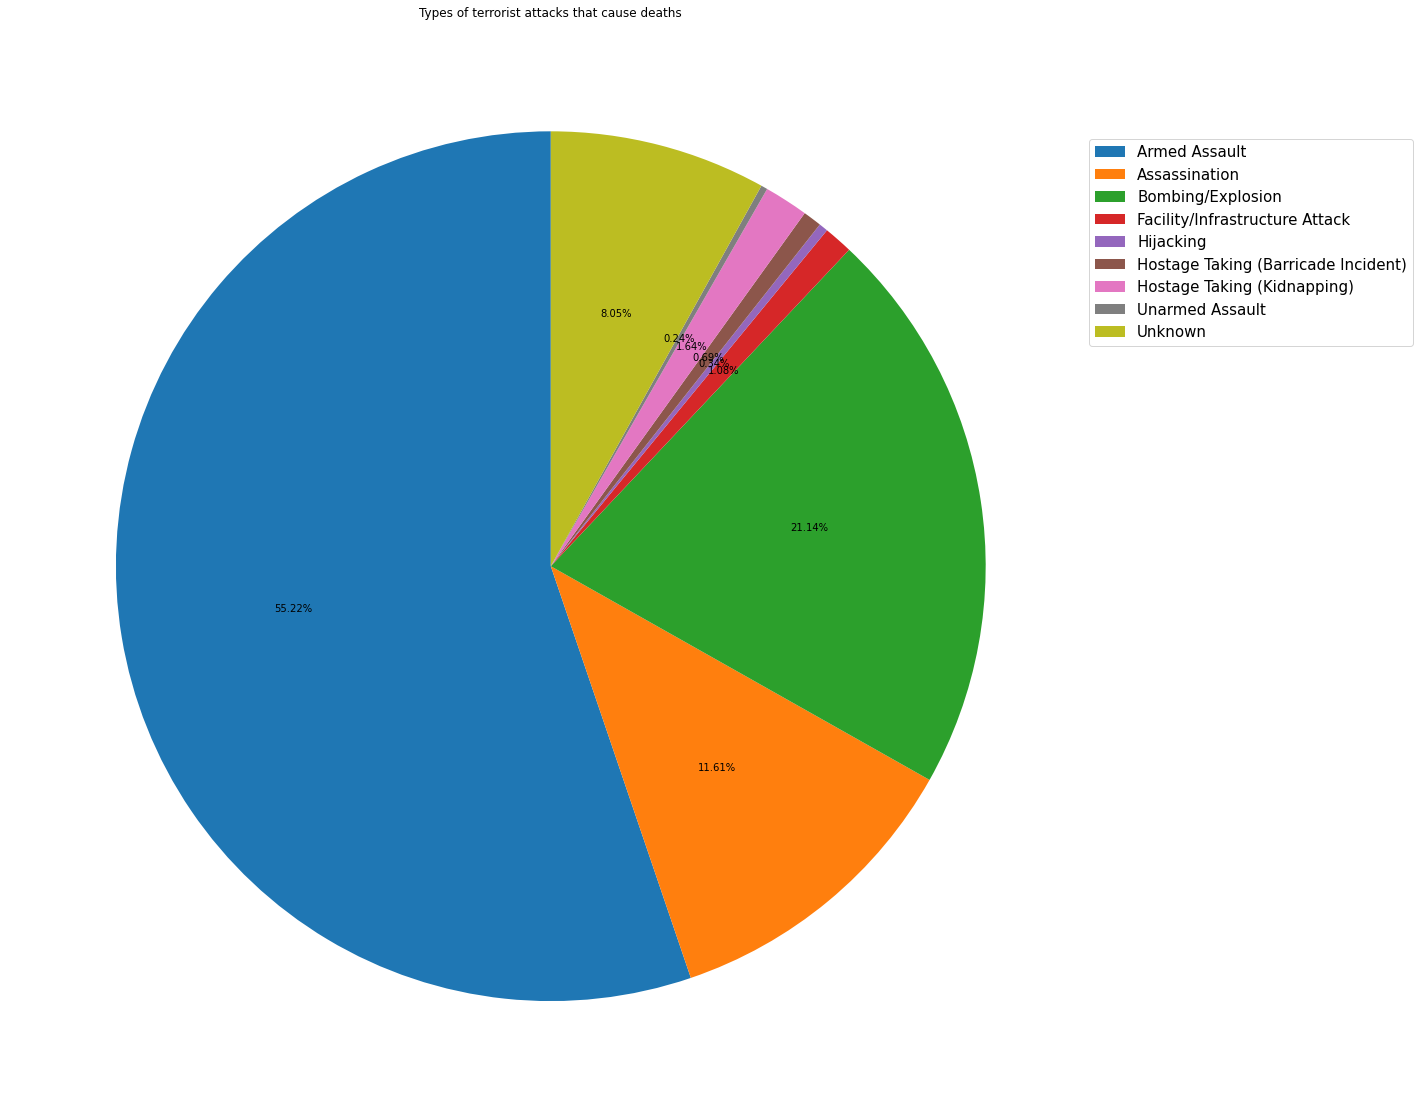

In [22]:

labels = typeKillFormatData.columns.tolist() 
transpoze = typeKillFormatData.T 
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=15) 
plt.show()

Number of Killed in Terrorist Attacks by Countries.

In [23]:
countryData = data.loc[:,'country':'country_txt']
countryKillData = pd.concat([countryData, killData], axis=1)

In [24]:
countryKillFormatData = countryKillData.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
countryKillFormatData

country_txt,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
nkill,407.0,37.0,7291.0,0.0,1935.0,0.0,490.0,21.0,13.0,27.0,...,1.0,0.0,567.0,97.0,1.0,69.0,106.0,324.0,70.0,136.0


In [25]:
countryKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Columns: 196 entries, Afghanistan to Zimbabwe
dtypes: float64(196)
memory usage: 1.5+ KB


In [26]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

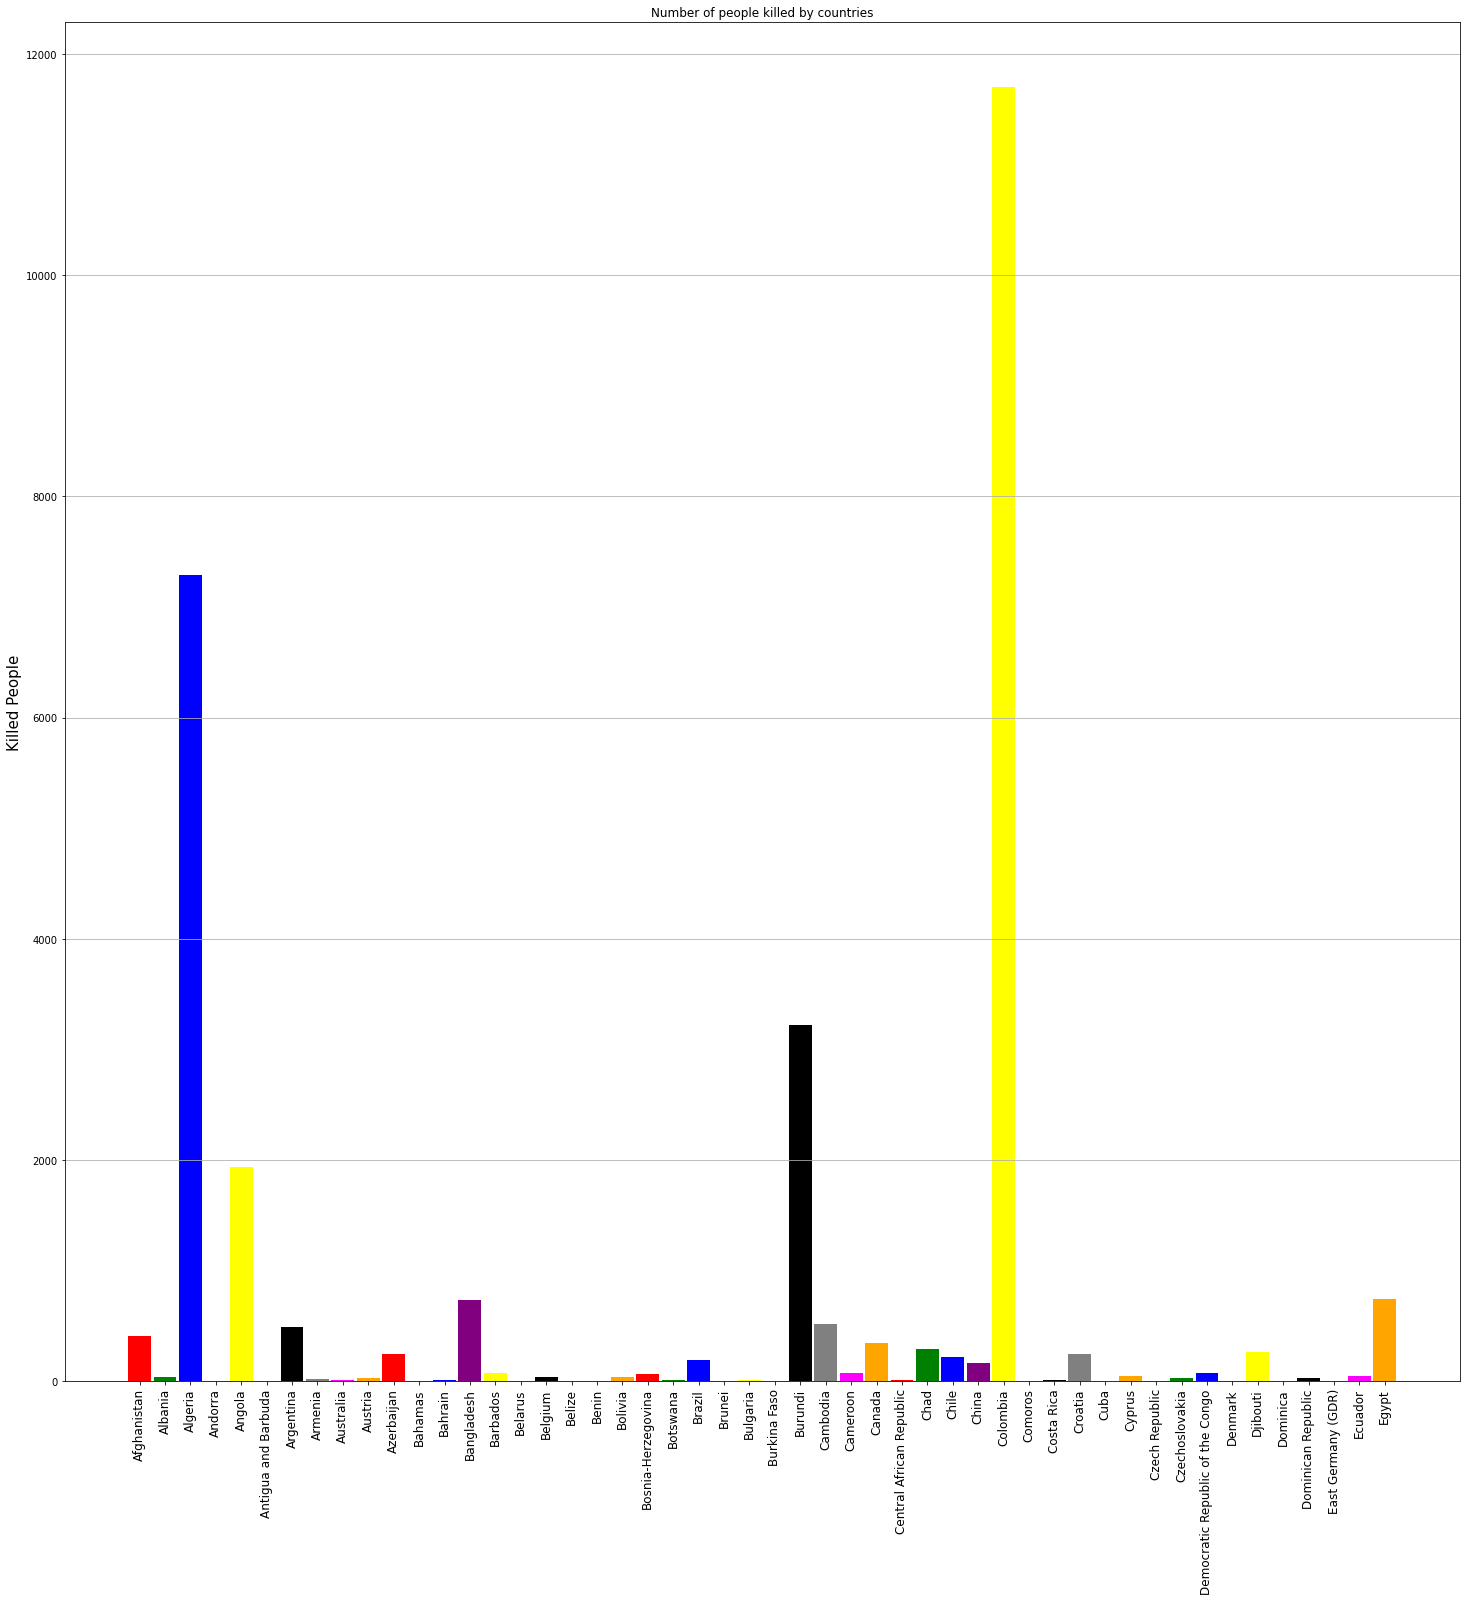

In [27]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] 
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values]  
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']  
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()

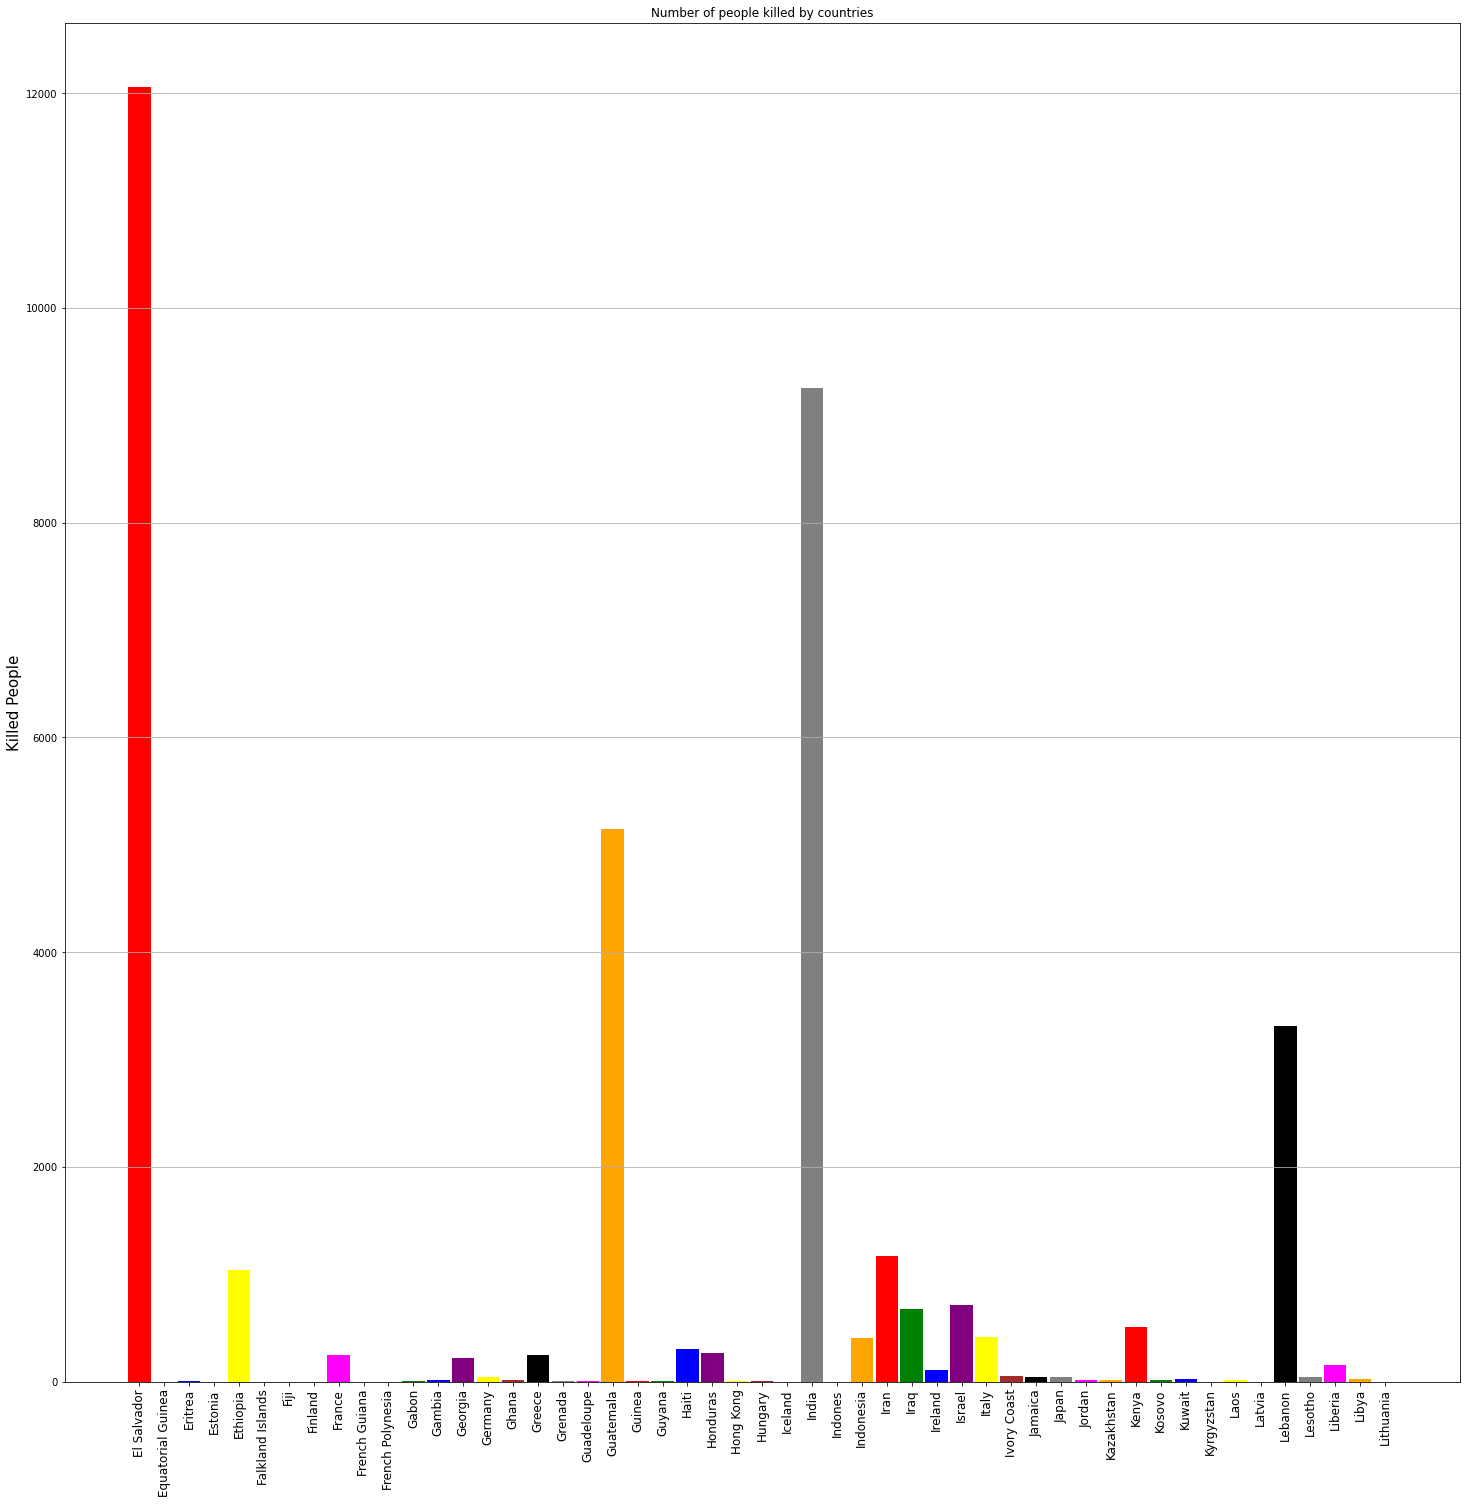

In [28]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=15)
plt.xticks(index, labels, fontsize=12, rotation=90)
plt.title('Number of people killed by countries')
plt.show()

Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences. The Middle East and North Africa are seen to be the places of serious terrorist attacks. In addition, even though there is a perception that Muslims are supporters of terrorism, Muslims are the people who are most damaged by terrorist attacks. If you look at the graphics, it appears that Iraq, Afghanistan and Pakistan are the most damaged countries. 